# Extracting a single channel

Written by Simon M. Mudd at the University of Edinburgh. Updated 02/09/2021

Import the various 'lsdviztools' and 'lsdttparamselector' modules.

In [1]:
import lsdviztools.lsdbasemaptools as bmt
from lsdviztools.lsdplottingtools import lsdmap_gdalio as gio
import lsdviztools.lsdmapwrappers as lsdmw

## Get the DEM

Grab the DEM from opentopography.org

In [2]:
SB_DEM = bmt.ot_scraper(source = "SRTM30",longitude_W = -120.464655, longitude_E = -120.254214, latitude_S = 34.440538, latitude_N = 34.610770,prefix = "CP")
SB_DEM.print_parameters()

The source is: SRTMGL1
The west longitude is: -120.464655
The east longitude is: -120.254214
The south latitude is: 34.61077
The north latitude is: 34.440538
The path is: ./
The prefix is: CP
The resolution is: 30


In [3]:
fullfname,DataDirectory,RasterFile = SB_DEM.download_pythonic()

I am going to download the following for you:
https://portal.opentopography.org/API/globaldem?demtype=SRTMGL1&south=34.440538&north=34.61077&west=-120.464655&east=-120.254214&outputFormat=GTiff
This might take a little while, depending on the size of the file. 
The filename will be:
./CP_SRTMGL1.tif
The path and file without path are:
./  CP_SRTMGL1.tif
Finished downloading


In [4]:
print(fullfname,DataDirectory,RasterFile)

./CP_SRTMGL1.tif ./ CP_SRTMGL1.tif


In [5]:
fullfname = "./CP_SRTM30.tif"
DataDirectory= "./"
RasterFile = "CP_SRTM30.tif"

Convert to UTM coordinates and ENVI bil format for *LSDTopoTools*

In [6]:
raster_bil_name = gio.convert4lsdtt(DataDirectory, RasterFile,minimum_elevation=0.01)
print(raster_bil_name)

The projections is:
GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
And some extra projection information strings:
None
WGS 84
The centre of the raster is at:
(-120.37972222221434, 34.50555555555218)
dem_data.width is: 758
The latitude and longitude is
34.50555555555218 -120.37972222221434
res tuple is:
(30, 30)
The destination CRS is: EPSG:32610
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 661, 'height': 647, 'count': 1, 'crs': CRS.from_epsg(32610), 'transform': Affine(30.0, 0.0, 732452.2754693646,
       0.0, -30.0, 3833330.7356094)}
Removing pixels with an elevation less than 0.01
CP_SRTM30_UTM.bil


# Get the point from which to extract the channel

In [7]:
import pandas as pd

In [8]:
d = {'id': [0], 'latitude': [34.550732], 'longitude': [-120.287266]}
df = pd.DataFrame(data=d)

Print this to a csv file

In [9]:
df.to_csv("channel_source.csv",index=False)

# Set up parameters for an *lsdtopotools* run

In [10]:
lsdtt_parameters = {"write_hillshade" : "true", 
                    "extract_single_channel" : "true", 
                    "channel_source_fname" : "channel_source.csv", 
                    "print_dinf_drainage_area_raster" : "true",
                    "convert_csv_to_geojson" : "true"}

Create a driver object

In [11]:
lsdtt_drive = lsdmw.lsdtt_driver(read_prefix = "CP_SRTM30_UTM",
                                 write_prefix= "CP_SRTM30_UTM",
                                 parameter_dictionary=lsdtt_parameters)
lsdtt_drive.print_parameters()

The lsdtopotools command line tools available are: 
['lsdtt-basic-metrics', 'lsdtt-channel-extraction', 'lsdtt-chi-mapping', 'lsdtt-cosmo-tool', 'lsdtt-hillslope-channel-coupling']
Please note only lsdtt-basic-metrics has been fully tested
The command line tool is: lsdtt-basic-metrics
The driver name is: Test_01
The read path is: ./
The write path is: ./
The read prefix is: CP_SRTM30_UTM
The write prefix is: CP_SRTM30_UTM
The parameter dictionary is:
{'write_hillshade': 'true', 'extract_single_channel': 'true', 'channel_source_fname': 'channel_source.csv', 'print_dinf_drainage_area_raster': 'true', 'convert_csv_to_geojson': 'true'}


Run *lsdtopotools*

In [12]:
lsdtt_drive.run_lsdtt_command_line_tool()

Done writing the driver file
I've finised writing the driver file. Let me run LSDTT for you.
|| Welcome to the LSDTopoTools basic metrics tool!     ||
|| This program has a number of options for calculating||
|| simple landscape metrics.                           ||
|| This program was developed by Simon M. Mudd         ||
||  at the University of Edinburgh                     ||
|| If you use these routines please cite:              ||
|| https://www.doi.org/10.5281/zenodo.2560223          ||
|| If you use the roughness routine please cite:       ||
|| https://www.doi.org/10.5194/esurf-3-483-2015        ||
|| Documentation can be found at:                      ||
|| https://lsdtopotools.github.io/LSDTT_documentation/ ||
|| You have called an LSDTopoTools program.            ||
|| Prepare to explore topographic data!                ||
|| You can read the documentation at:                  ||
I have one argument. I don't know if this is a directory path
or a driver filename. I am going 

## Look at the point data

In [13]:
from lsdviztools.lsdplottingtools import lsdmap_pointtools as lsdpt

In [14]:
point_data_name = "single_channel_nodes.csv"
pointdata = lsdpt.LSDMap_PointData(point_data_name)

I did not find a valid separator. I am assuming the path is ./
The object file prefix is: single_channel_nodes
Loading your file from csv
done


Lets get some information from this file

In [15]:
pointdata.GetParameterNames()

['id',
 'row',
 'column',
 'latitude',
 'longitude',
 'x',
 'y',
 'flow distance(m)',
 'drainage area (m^2)',
 'elevation(m)']

Get the flow distance and elevation 

In [16]:
fd = pointdata.QueryData("flow distance(m)")
z =  pointdata.QueryData("elevation(m)")
da = pointdata.QueryData("drainage area (m^2)")

Scale a logarithmic version of drainage area for point scaling

In [17]:
import numpy as np

In [18]:
da = np.asarray(da)
logda = np.log(da)

In [19]:
damin = np.min(logda)
damax = np.max(logda)
logda = np.subtract(logda,damin)
logda = np.divide(logda,(damax-damin))
logda = np.multiply(logda,50)
logda = np.add(logda,2)

In [20]:
import matplotlib.pyplot as plt

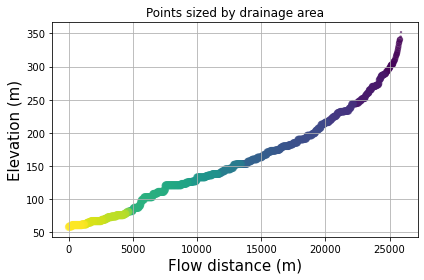

In [21]:
%matplotlib inline

fig, ax = plt.subplots()
ax.scatter(fd, z, c=da, s=logda, alpha=0.5)

ax.set_xlabel(r'Flow distance (m)', fontsize=15)
ax.set_ylabel(r'Elevation (m)', fontsize=15)
ax.set_title('Points sized by drainage area')

ax.grid(True)
fig.tight_layout()

plt.show()

Now remove points below 150 m elevation

In [22]:
pointdata2 = pointdata
pointdata2.selectValue("elevation(m)",value = 149.999, operator=">")

I am selecting your data for specific elevation(m)


In [23]:
fd = pointdata2.QueryData("flow distance(m)")
z =  pointdata2.QueryData("elevation(m)")
da = pointdata2.QueryData("drainage area (m^2)")

In [24]:
da = np.asarray(da)
logda = np.log(da)
damin = np.min(logda)
damax = np.max(logda)
logda = np.subtract(logda,damin)
logda = np.divide(logda,(damax-damin))
logda = np.multiply(logda,50)
logda = np.add(logda,2)

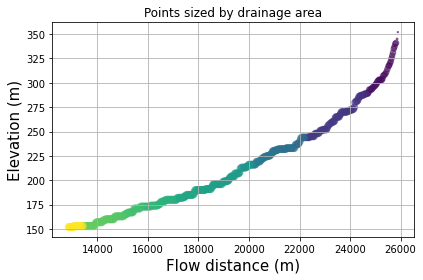

In [25]:
fig, ax = plt.subplots()
ax.scatter(fd, z, c=da, s=logda, alpha=0.5)

ax.set_xlabel(r'Flow distance (m)', fontsize=15)
ax.set_ylabel(r'Elevation (m)', fontsize=15)
ax.set_title('Points sized by drainage area')

ax.grid(True)
fig.tight_layout()

plt.show()